In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
from ipaddress import IPv4Network
import requests
import seaborn as sns

simplefilter(action='ignore', category=FutureWarning)
index = 1
dataset = ["tester", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX"]

df = pd.read_csv("./dataset/MachineLearningCVE/"+dataset[index]+ ".csv")

if dataset[index] == "tester":
    df.drop(["Flow ID", " Source IP", " Destination IP", " Timestamp"], axis = 1, inplace = True)





#convert good and bad to numbers
df[" Label"].replace("BENIGN", 0,  inplace = True)
df[" Label"].replace("Bot", 1,  inplace = True)
df[" Label"].replace("DDoS", 2, inplace = True)
df[" Label"].replace("DoS Hulk", 3, inplace = True)
df[" Label"].replace("DoS Slow-httptest", 4, inplace = True)
df[" Label"].replace("FTP-Patator", 5, inplace = True)
df[" Label"].replace("Heartbleed", 6, inplace = True)
df[" Label"].replace("PortScan", 7, inplace = True)
df[" Label"].replace("SSH-Patator", 8, inplace = True)
df[" Label"].replace("DoS GoldenEye", 9, inplace = True)
df[" Label"].replace("DoS slowloris", 10, inplace = True)
df[" Label"].replace("Infiltration", 11, inplace = True)
df[" Label"].replace("Web Attack – Brute Force", 12, inplace = True)
df[" Label"].replace("Web Attack – Sql Injection ",13, inplace = True)
df[" Label"].replace("DoS slowloris", 14, inplace = True)
df= df.replace([np.inf, -np.inf, np.nan, None], -999)


# Define independent variables
factors = df.iloc[ : , :-1].values 



# Define dependent variable
labels=df.iloc[:,-1].values

print(labels)




# check if there are any NAs in dataset
pd.set_option("display.max_rows", None)

# print(df.dtypes)

x_train, x_test, y_train, y_test = train_test_split(factors, labels, test_size = 0.2, random_state = 20)


model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(x_train.astype(np.float64), y_train)
predict = model.predict(x_test)


# train the model
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

matrix = confusion_matrix( y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)



print("Accuracy =", str(metrics.accuracy_score(y_test, predict) * 100) + "%")



[0 0 0 ... 0 0 0]
Accuracy = 99.98449578063745%


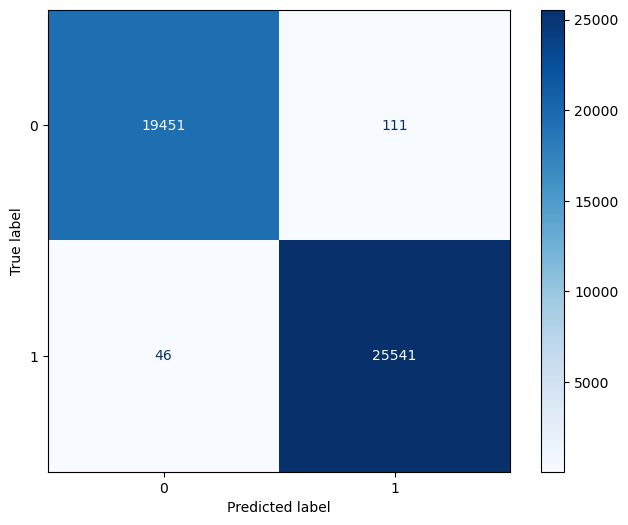

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
# disp.ax_.set_xlabel("actual")
# disp.ax_.set_ylabel("predicted")
plt.show()
